In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.optimize import curve_fit

In [2]:
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['font.family'] = 'sans-serif'


In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('classic')


Questions
- How do I fit data to a specified function?

- How do I assess the quality of my fit?

- How do I determine the standard error for my fit parameters?

Objectives
- Use curve_fit from scipy to fit data to a specified functional form.

https://education.molssi.org/python-data-analysis/03-data-fitting/index.html

Python is a power tool for fitting data to any functional form.One can also calculate the standard error for any parameter in a functional fit

The basic steps to fitting data are:


- Import the curve_fit function from scipy.
- Create a list or numpy array of your independent variable (your x values). You might read this data in from another source, like a CSV file.
- Create a list of numpy array of your depedent variables (your y values). You might read this data in from another source, like a CSV file.
- Create a function for the equation you want to fit. The function should accept as inputs the independent variable(s) and all the parameters to be fit.
- Use the function curve_fit to fit your data.
- Extract the fit parameters from the output of curve_fit.
- Use your function to calculate y values using your fit model to see how well your model fits the data.
Graph your original data and the fit equation.



Now we will consider a set of x,y-data. This data has one independent variable (our x values) and one dependent variable (our y values). We will recast the data as numpy arrays, so we can use numpy features when we are evaluating our data. It is often very helpful to look at a plot of the data when deciding what functional form to fit.



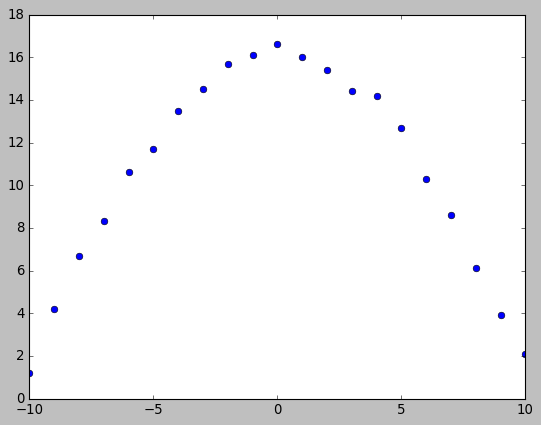

In [5]:
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

This data could probably be fit to many functional forms. We will try two different functional forms. (Looking at data and knowing what function it might fit is non-trivial and beyond the scope of this lesson. For purposes of this lesson, we will simply fit the data to given functional forms.)

- Gaussian Function: $y=ae^{-b\,x^2}$
- Cosine Function: $y=c\,cos(d\,x)$

# Case 1: The Gaussian function
First, let’s fit the data to the Gaussian function. Our goal is to find the values of A and B that best fit our data. First, we need to write a python function for the Gaussian function equation. The function should accept as inputs the independent varible (the x-values) and all the parameters that will be fit.



In [6]:
# Define the Gaussian function
def Gauss(x, a, b):
    y = a*np.exp(-b*x**2)
    return y

We will use the function curve_fit from the python module scipy.optimize to fit our data. It uses non-linear least squares to fit data to a functional form.

In [7]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)

/var/folders/px/h6xhv_615bdcvbzrl_q0jfsr0000gn/T/ipykernel_46845/2016754932.py:3: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*x**2)


The optimized values of a and b are now stored in the list parameters. From this, we can extract our best fit values of a and b and print them.

In [8]:
fit_a= parameters[0]
fit_b = parameters[1]
print("value of a =",fit_a)
print("value of b =",fit_b)

value of a = 16.934286356555333
value of b = 0.015739600982100074


Now we want to see how well our fit equation matched our data. To do this, we will calculate values of y, using our function and the fit values of a and b, and then we will make a plot to compare those calculated values to our data.

Text(0, 0.5, 'Y axix')

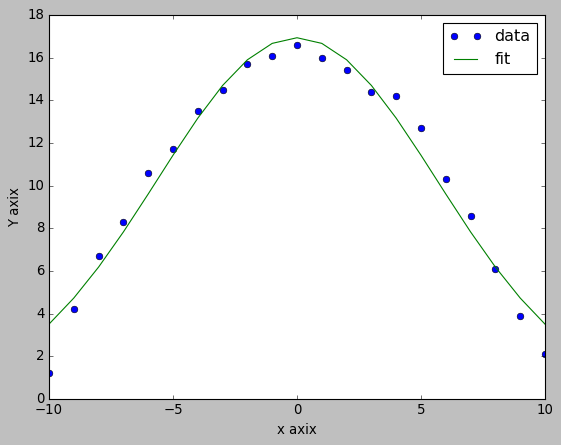

In [9]:
fit_y = Gauss(xdata, fit_a, fit_b)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()
plt.xlabel("x axix")
plt.ylabel("Y axix")

Looks like a good fit!

To calculate the standard error of the parameters from the covariance, you take the square root of the diagonal elements of the matrix. You can do this in one line using functions from numpy.


In [10]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of b is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 16.93429 with standard error of 0.35658.
The value of b is 0.01574 with standard error of 0.00087.


# Case 2 - the cosine function



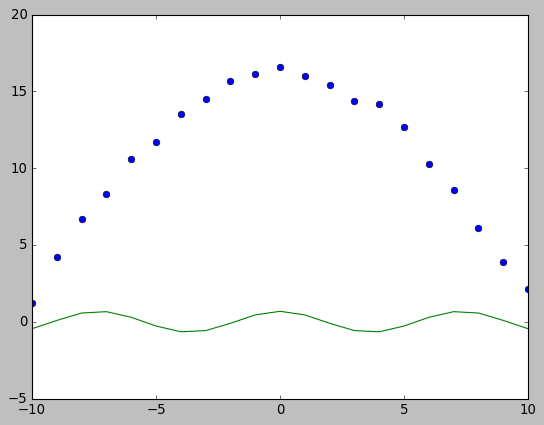

In [11]:
def cos_func(x, c, d):
    y = c*np.cos(d*x)
    return y

parameters, covariance = curve_fit(cos_func, xdata, ydata)
fit_c = parameters[0]
fit_d = parameters[1]

fit_cosine = cos_func(xdata, fit_c, fit_d)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

To fix this, we need to give a guess for what we think our parameters are. Thinking about the form of the cosine function, the height of the function is controlled by the D parameter. Looking at our graph, it seems the value of D is somewhere between 15 and 17, so we will guess 16. Similarly, the E parameter tells us how many cycles occur over the 0 to 2 $\pi$ interval. This is a very wide graph; there is clearly much less than one cycle between 0 and 2 $\pi$, so we will guess that E is 0.1. To incorporate these guesses into our code, we will create a new array called guess. We then specify our guess when we call curve_fit.

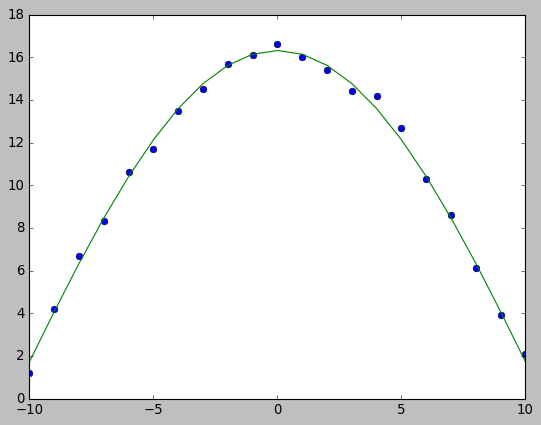

In [12]:
guess = [16, 0.1]
parameters, covariance = curve_fit(cos_func, xdata, ydata, p0=guess)
fit_c = parameters[0]
fit_d = parameters[1]

fit_cosine = cos_func(xdata, fit_c, fit_d)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.savefig('03-cosine_fit2.png')

Now that looks like a good fit!

Frequently, you will have to adjust your guesses to get a good fit for your data. If you understand the physical significance of your data and the equation you are trying to fit, you will have an easier time fitting your data.

Calculate the standard error for the D and E parameters. Print each parameter and its standard error.

In [13]:
SE = np.sqrt(np.diag(covariance))
SErr_c = SE[0]
SErr_d = SE[1]

print(F'The values of c is {fit_c:.5f} and the standard error is {SErr_c:.5f}.')
print(F'The value of d is {fit_d:.5f} and the standard error is {SErr_d:.5f}.')

The values of c is 16.31473 and the standard error is 0.11091.
The value of d is 0.14649 and the standard error is 0.00090.


# Example
Consider the following data computed for a helium dimer. The interaction energy at several different internuclear separations is given. Fit this data to a Lennard-Jones potential.

\begin{equation}
V(r)=4\epsilon\left[ \left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]
\end{equation}

The value of epsilon is 4.857 wavenumbers.
The value of sigma is 2.893 angstroms.


Text(0, 0.5, 'Potential V')

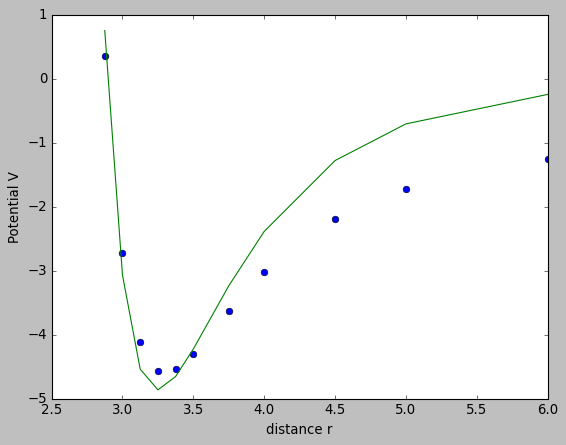

In [14]:
# Internuclear separation in angstroms

distances = [2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.75, 4.0, 4.5, 5.0, 6.0]
# Energy in Wavenumbers
energies = [0.35334378061169025, -2.7260131253801405, -4.102738968283382, -4.557042640311599, -4.537519193684069, -4.296388508321034, -3.6304745046204117, -3.0205368595885536, -2.1929538006724814, -1.7245616790238782, -1.2500789753171557]

distances = np.array(distances)
energies = np.array(energies)

def LJ_func(r, epsilon, sigma):
    V = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
    return V

parameters, covariance = curve_fit(LJ_func, distances, energies)

fit_epsilon = parameters[0]
fit_sigma = parameters[1]

print(F'The value of epsilon is {fit_epsilon:.3f} wavenumbers.')
print(F'The value of sigma is {fit_sigma:.3f} angstroms.')

fit_energies = LJ_func(distances, fit_epsilon, fit_sigma)

plt.plot(distances, energies, 'o', label='data')
plt.plot(distances, fit_energies, '-', label='LJ fit')
plt.xlabel("distance r")
plt.ylabel("Potential V")

Fitting with iminuit Package:

In [1]:
# basic setup of the notebook
from matplotlib import pyplot as plt
import numpy as np

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit